In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El conjunto de datos **Insurance Charges Dataset** se utiliza para modelar y predecir los cargos médicos de un seguro de salud en función de varios factores. Este conjunto de datos incluye información sobre individuos que podrían afectar el costo de sus seguros médicos.

### Variables del conjunto

1. **Age**: Edad del individuo
2. **Sex**: Género del indivuo
3. **BMI**: Índice de Masa Corporal
4. **Children**: Número de hijos/dependientes cubiertos por el seguro
5. **Smoker**: Si el individuo es fumador o no
6. **Region**: Región geográfica en los EE.UU. donde reside el individuo
7. **Charges**: Gastos médicos individuales anuales facturados por el seguro

El objetivo principal de trabajar con este conjunto es construir un modelo predictivo que pueda estimar los costos médicos basándose en las características proporcionadas. Este tipo de análisis es crucial en la industria de seguros para determinar las primas adecuadas para los clientes, anticipar gastos médicos y optimizar la gestión de riesgos.

In [ ]:
data = pd.read_csv('/content/sample_data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Cantidad de filas y columnas
data.shape

(1338, 7)

In [ ]:
# Información general del conjunto
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Resumen estadístico del conjunto
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

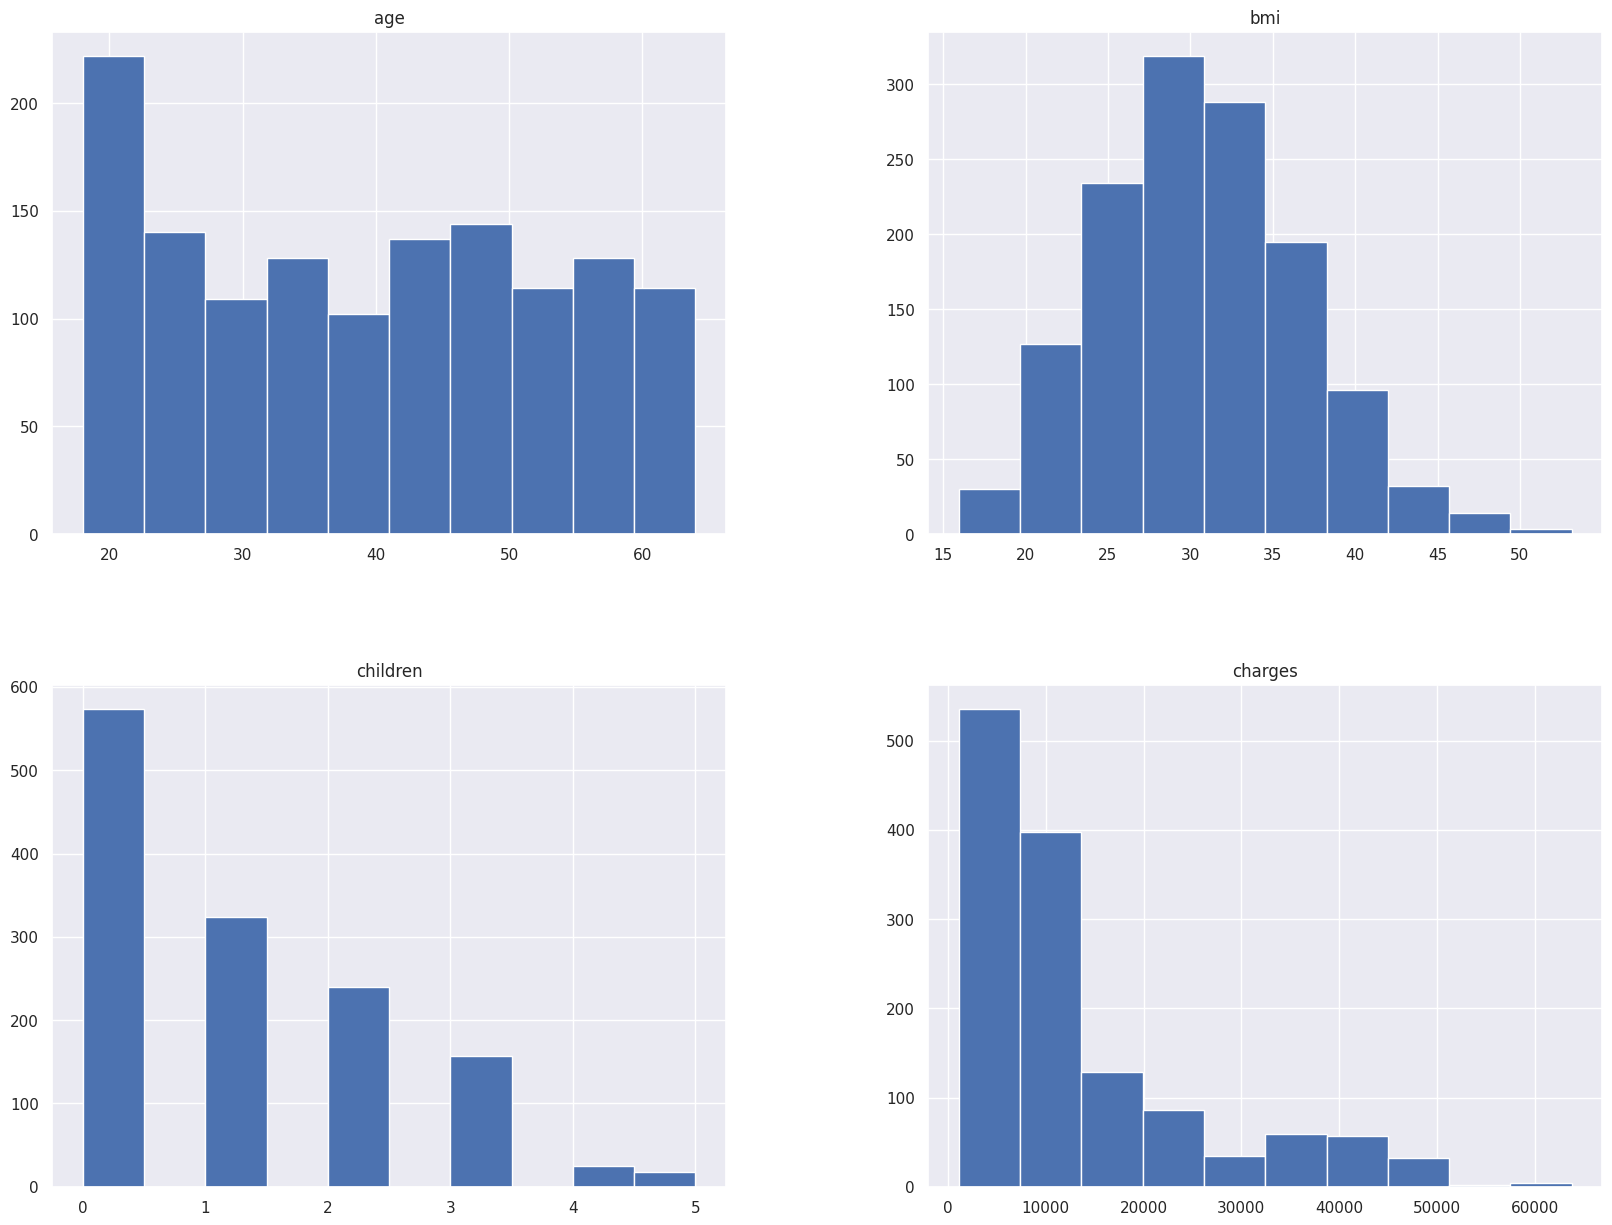

In [ ]:
data.hist(figsize=(20, 15))

La distribución de los datos en la columna `charges` es cola a la derecha, por lo que en este caso podemos ver que tenemos datos atípicos. Los cuales podemos ver mejor en el diagrama de caja y bigotes.

<Axes: >

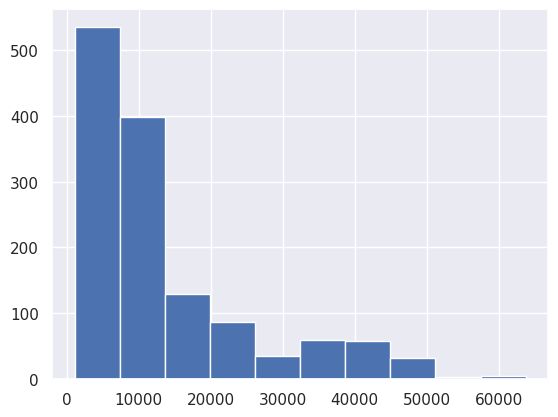

In [ ]:
data['charges'].hist()

<Axes: xlabel='charges', ylabel='Count'>

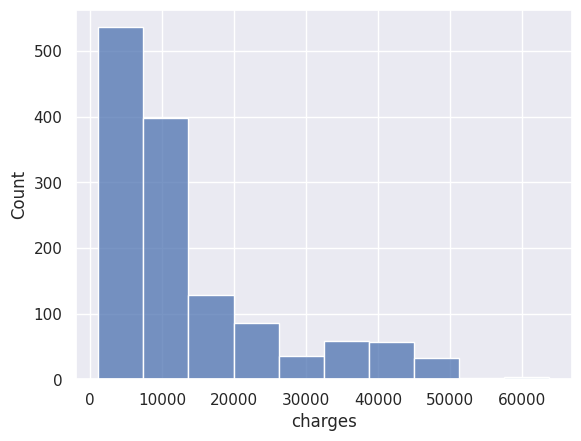

In [ ]:
sns.set(style='darkgrid')
sns.histplot(data=data, x='charges', bins=10)

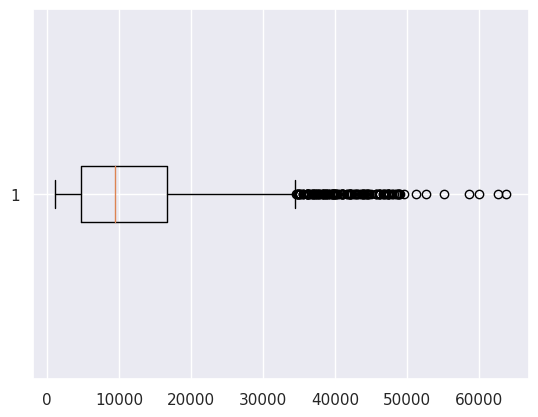

In [ ]:
plt.boxplot(data['charges'], vert=False)
plt.show()

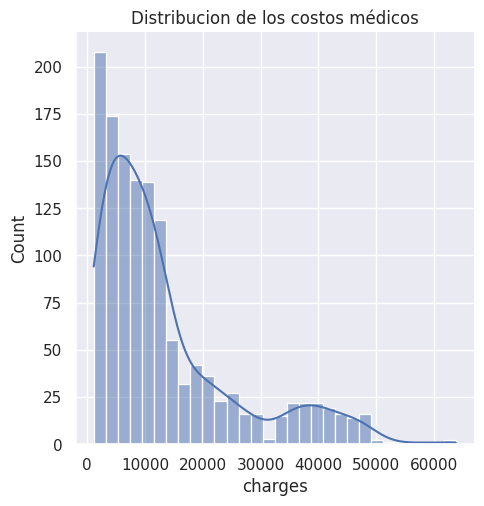

In [ ]:
sns.displot(data['charges'], kde=True)
plt.title('Distribucion de los costos médicos')
plt.show()

Cuando el histograma de una variable muestra una cola hacia la derecha, significa que la distribución es asimétrica positiva (o sesgada a la derecha). Para corregir esta asimetría y hacer que la distribución sea más cercana a una distribución normal, puedes utilizar varias tecnicas de transformación.

### Transformación Logarítmica

Se aplica el logaritmo natural (o logaritmo en base 10) a la variable. Es útil cuando la variable tiene valores que varían en órdenes de magnitud. $ log(charges) = np.log(data['columna']) $

### Transformación de Raíz Cuadrada

Se toma la raíz cuadrada de la variable. Reduce la asimetría pero es menos agresiva que la transformación logarítmica. $sqrt(charges) = np.sqrt(data['columna'])$

#### ¿Por qué aplicar la transformación logarítmica?

1. Reducir la asimetría en la distribución
  - Mativo: Si la variable dependiente tiene una distribución altamente sesgada, como una cola larga a la derecha, la transformación logarítmica puede ayudar a normalizarla.
  - Beneficio: Eso hace que la distribución de la variable sea más simétrica y se acerque más a una distribución normal, lo cual es un supuesto clave para muchos métodos estadísticos y modelos de regresión.
2. Manejo de outliers
  - Motivo: Los valores extremadamente altos en la variable dependiente pueden tener un impacto desproporcionado en el modelo de regresión. La transformación logarítmica reduce la magnitud de estos valores extremos.
  - Beneficio: Esto puede hacer que el modelo sea más robusto y menos sensible a los outliers, mejorando la capacidad predictiva y la estabilidad del modelo.
3. Facilitar la interpretación de resultados
  - Motivo: En algunos casos, los cambios relativos (porcentuales) en la variable dependiente son más relevantes que los cambios absolutos. La transformación logarítmica permite interpretar los coeficientes del modelo en términos de porcentajes o elasticidades.
  - Beneficio: Esto puede proporcionar una interpretación más intuitiva y útil de los efectos de las variables independientes sobre la variable dependiente, especialmente en campos como la economía y las finanzas.
4. Mejora del ajuste del modelo
  - Motivo: A veces, aplicar una transformación logarítmica mejora el ajuste del modelo a los datos, lo que puede verse reflejado en mejores métricas de rendimiento, como un menor error cuadrático medio (MSE) o un mayor $R^2$
  - Beneficio: Un mejor ajuste significa que el modelo está capturando mejor las relaciones subyacentes entre las variables, lo que puede llevar a predicciones más precisas.

#### Cuando no Aplicar la Transformación Logarítmica
- **Valores Negativos o Cero**: La transformación logarítmica solo es aplicable si todos los valores de la variable dependiente son positivas. Si hay ceros o valores negativos, es necesario manejarlos antes de aplicar la transformación.

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy['charges'] = np.log10(data_copy['charges'])

<Axes: xlabel='charges', ylabel='Count'>

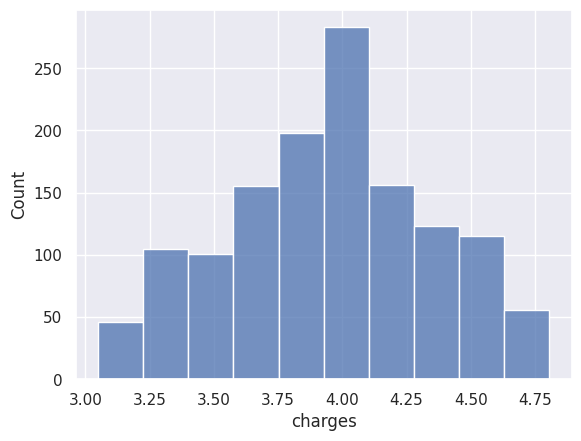

In [ ]:
sns.histplot(data=data_copy, x='charges', bins=10)

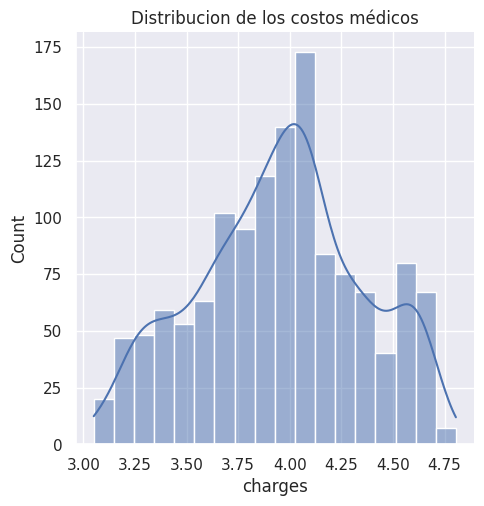

In [ ]:
sns.displot(data_copy['charges'], kde=True)
plt.title('Distribucion de los costos médicos')
plt.show()

<ipython-input-50-fbb70b9d6b08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='region', x='charges', data=region_df, palette='viridis')


<Axes: xlabel='charges', ylabel='region'>

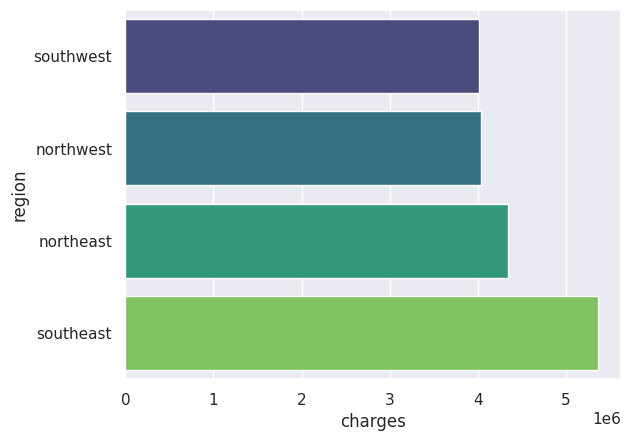

In [ ]:
region = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
region_df = region.reset_index()

sns.barplot(y='region', x='charges', data=region_df, palette='viridis')

<Axes: xlabel='region', ylabel='charges'>

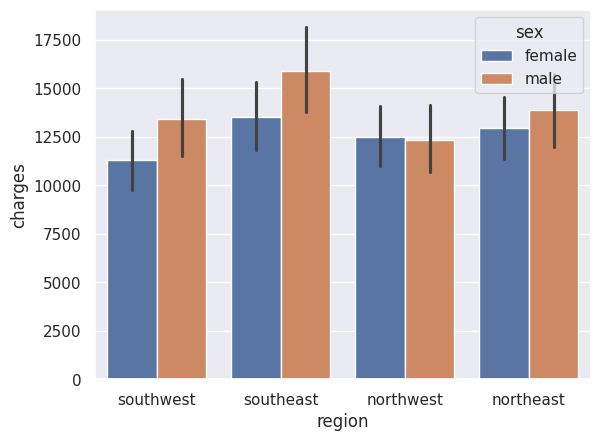

In [ ]:
sns.barplot(x='region', y='charges', hue='sex', data=data)

<Axes: xlabel='region', ylabel='charges'>

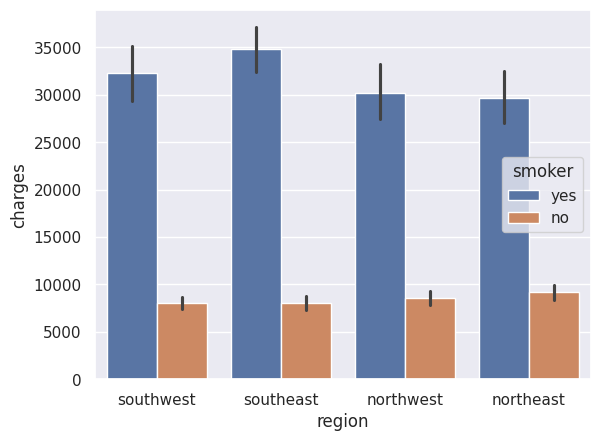

In [ ]:
sns.barplot(x='region', y='charges', hue='smoker', data=data)

<Axes: xlabel='age', ylabel='charges'>

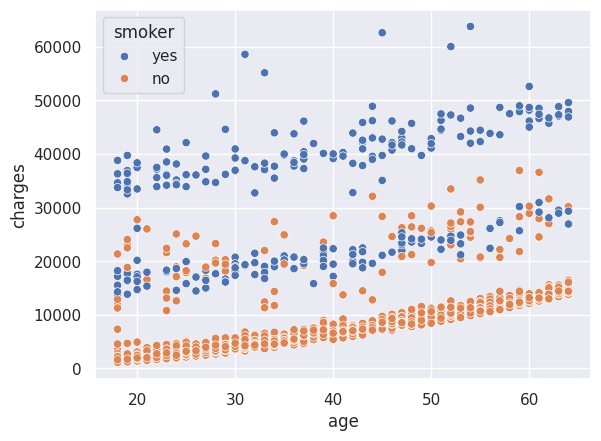

In [ ]:
sns.scatterplot(data=data, x="age", y="charges", hue="smoker")

<Axes: xlabel='bmi', ylabel='charges'>

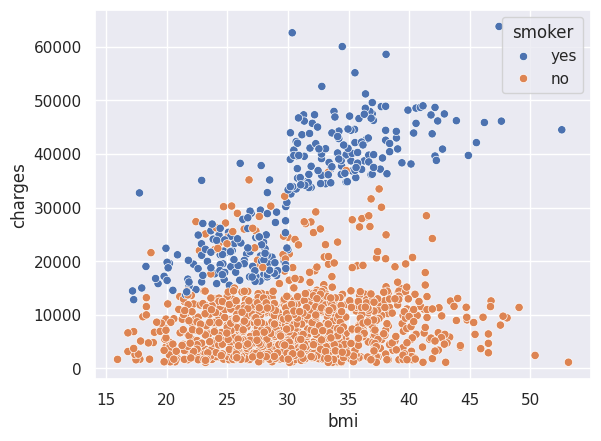

In [ ]:
sns.scatterplot(data=data, x="bmi", y="charges", hue="smoker")

Manejar datos categóricos, en este caso tenemos varios valores dentro de la columna `region`, por eso en este caso utilizaremos el método **One-Hot Encoding**

In [ ]:
data_encoded = pd.get_dummies(data, columns=['region'], drop_first=True)
data_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,True
1,18,male,33.770,1,no,1725.55230,False,True,False
2,28,male,33.000,3,no,4449.46200,False,True,False
3,33,male,22.705,0,no,21984.47061,True,False,False
4,32,male,28.880,0,no,3866.85520,True,False,False


`drop_first=True`: Este argumento elimina una de las columnas resultantes para evitar la multicolinealidad (redundancia en los datos), algo que es importante en modelos lineales.

In [ ]:
data_copy_encoded = pd.get_dummies(data_copy, columns=['region'], drop_first=True)
data_copy_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,4.227499,False,False,True
1,18,male,33.770,1,no,3.236928,False,True,False
2,28,male,33.000,3,no,3.648308,False,True,False
3,33,male,22.705,0,no,4.342116,True,False,False
4,32,male,28.880,0,no,3.587358,True,False,False


In [ ]:
data_copy_encoded = pd.get_dummies(data_copy_encoded, columns=['sex', 'smoker'], drop_first=True)
data_copy_encoded.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,4.227499,False,False,True,False,True
1,18,33.770,1,3.236928,False,True,False,True,False
2,28,33.000,3,3.648308,False,True,False,True,False
3,33,22.705,0,4.342116,True,False,False,True,False
4,32,28.880,0,3.587358,True,False,False,True,False


In [ ]:
data_encoded = pd.get_dummies(data_encoded, columns=['sex', 'smoker'], drop_first=True)
data_encoded.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,False,True,False,True
1,18,33.770,1,1725.55230,False,True,False,True,False
2,28,33.000,3,4449.46200,False,True,False,True,False
3,33,22.705,0,21984.47061,True,False,False,True,False
4,32,28.880,0,3866.85520,True,False,False,True,False


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   region_northwest  1338 non-null   bool   
 5   region_southeast  1338 non-null   bool   
 6   region_southwest  1338 non-null   bool   
 7   sex_male          1338 non-null   bool   
 8   smoker_yes        1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


In [ ]:
data_copy_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   region_northwest  1338 non-null   bool   
 5   region_southeast  1338 non-null   bool   
 6   region_southwest  1338 non-null   bool   
 7   sex_male          1338 non-null   bool   
 8   smoker_yes        1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


In [ ]:
data_copy_encoded[['smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_male']] = data_copy_encoded[['smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_male']].astype(int)
data_copy_encoded.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,4.227499,0,0,1,0,1
1,18,33.770,1,3.236928,0,1,0,1,0
2,28,33.000,3,3.648308,0,1,0,1,0
3,33,22.705,0,4.342116,1,0,0,1,0
4,32,28.880,0,3.587358,1,0,0,1,0


In [ ]:
data_encoded[['smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest', 'sex_male']] = data_encoded[['smoker_yes','region_northwest', 'region_southeast', 'region_southwest', 'sex_male']].astype(int)
data_encoded.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


### Entrenamiento de los algoritmos de Machine Learning

Lo primero que debemos de hacer es escalar variables, aunque las columnas de `get_dummies` son binarias (0, 1), es buena práctica escalar todas las características de entrada, incluidas las columnas `get_dummies`. Esto es porque algunos modelos de machine learning, como la regresión logística o la SVM, pueden beneficiarse de tener todas las características en la misma escala. Esto puede prevenir que las características numéricas escalen de manera inapropiada y tengan un impacto desproporcionado en el modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Primero con el conjunto del log10 en charges
X = data_copy_encoded.drop('charges', axis=1).values
y = data_copy_encoded['charges'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

- **Error Absoluto Medio (Mean Absolute Error)**: Calcula la media de los valores absolutos de los errores entre las predicciones y los valores reales. No penaliza tanto los errores grandes como el MSE, lo que puede ser preferible si no se quiere dar un peso excesivo a grandes errores.

- **Coeficiente de Determinación (R-Squared)**: Mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de $R^2$ de 1 indica un modelo perfecto, mientras que 0 indica que el modelo no explica ninguna variación en los datos.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Abosolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

Mean Abosolute Error (MAE): 0.12
R-Squared (R2): 0.80


<Axes: >

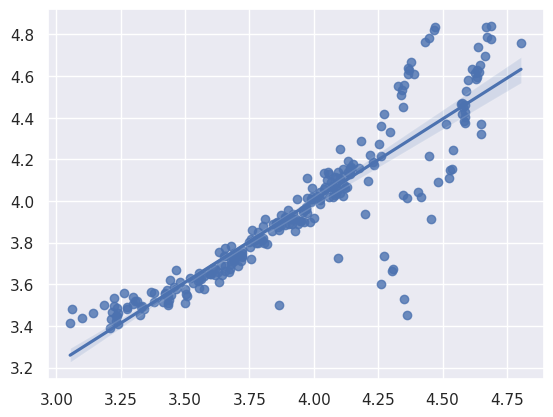

In [ ]:
sns.regplot(x = y_test, y = y_pred)

#### Interpretación

##### MAE

Un valor de *0.12* indica que, en promedio, las predicciones del modelo se desvían de los valores reales en *0.12* unidades (en las mismas unidades que la variable dependiente). El MAE es más fácil de interpretar que el MSE porque está en la misma escala que los datos originales y no penaliza tan severamente los erroes grandes. Un MAE de *0.12* indica un error promedio relativamente pequeño, lo que sugiere que el modelo está haciendo predicciones razonablemente precisas.

##### R-SQUARED

Un valor de $R^2$ de *0.80* significa que el 80% de la variabilidad de los datos de salida se explica por el modelo, mientras que el 20% restante es explicado por otras variables o por ruido. Un $R^2$ de *0.80* es considerado un buen valor, indicando que el modelo captura la mayor parte de la relación entre las variables predictoras y la variable objetivo. Sin embargo, $R^2$ no indica si el modelo es el mejor posible o si existe sobreajuste. También puede verse afectado por la cantidad de variables en el modelo.

In [ ]:
# Sin la normalizacion de los datos en 'charges'
X = data_encoded.drop('charges', axis=1).values
y = data_encoded['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred = lin_reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Abosolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

Mean Abosolute Error (MAE): 4181.19
R-Squared (R2): 0.78


<Axes: >

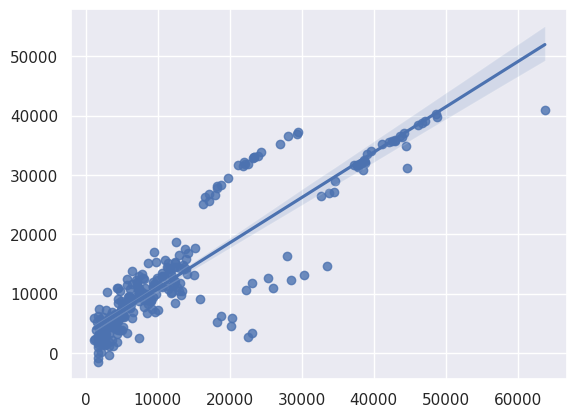

In [ ]:
sns.regplot(x = y_test, y = y_pred)

#### SVR

In [ ]:
# SVR
from sklearn.svm import SVR

In [ ]:
# Sin la normalizacion de los datos en 'charges'
X = data_copy_encoded.drop('charges', axis=1).values
y = data_copy_encoded['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Abosolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

Mean Abosolute Error (MAE): 0.11
R-Squared (R2): 0.85


<Axes: >

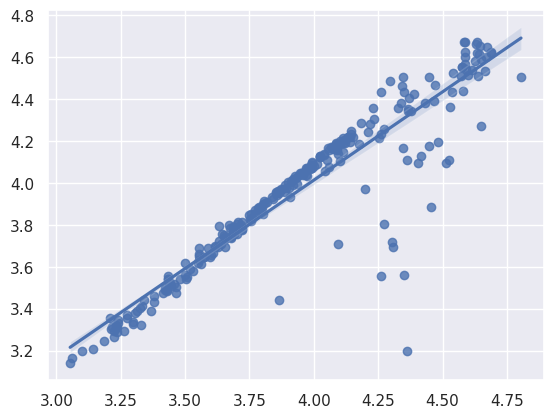

In [ ]:
sns.regplot(x = y_test, y = y_pred)

In [ ]:
# Sin la normalizacion de los datos en 'charges'
X = data_encoded.drop('charges', axis=1).values
y = data_encoded['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Abosolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

Mean Abosolute Error (MAE): 8612.41
R-Squared (R2): -0.07


<Axes: >

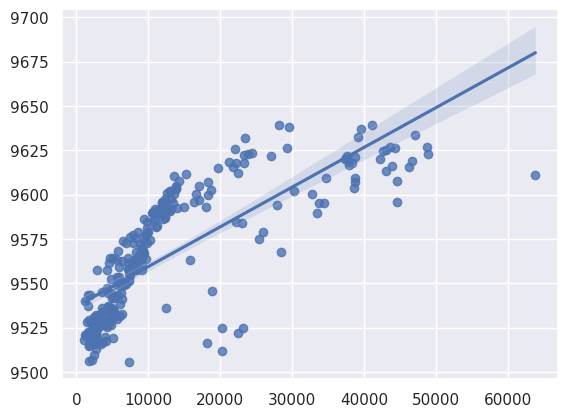

In [ ]:
sns.regplot(x = y_test, y = y_pred)

#### Árboles de Regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:

X = data_copy_encoded.drop('charges', axis=1).values
y = data_copy_encoded['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tr = DecisionTreeRegressor()
tr.fit(X_train_scaled, y_train)
y_pred = tr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Abosolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

Mean Abosolute Error (MAE): 0.08
R-Squared (R2): 0.81


<Axes: >

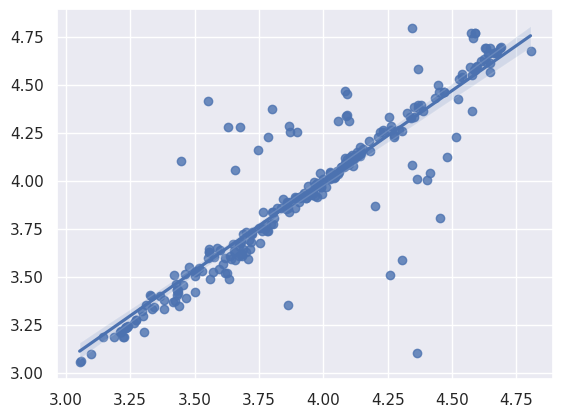

In [ ]:
sns.regplot(x = y_test, y = y_pred)

In [ ]:
# Sin la normalizacion de los datos en 'charges'
X = data_encoded.drop('charges', axis=1).values
y = data_encoded['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

tr = DecisionTreeRegressor()
tr.fit(X_train_scaled, y_train)
y_pred = tr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Abosolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

Mean Abosolute Error (MAE): 3187.35
R-Squared (R2): 0.72


<Axes: >

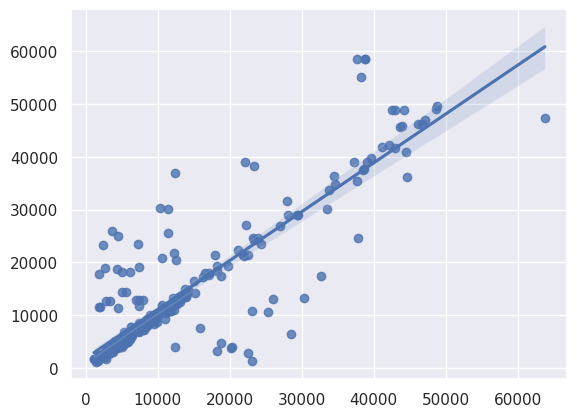

In [ ]:
sns.regplot(x = y_test, y = y_pred)

In [ ]:
# Sin la normalizacion de los datos en 'charges'
X = data_encoded.drop('charges', axis=1).values
y = data_encoded['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tr = DecisionTreeRegressor()
tr.fit(X_train_scaled, y_train)
y_pred = tr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Abosolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

Mean Abosolute Error (MAE): 3022.60
R-Squared (R2): 0.75


<Axes: >

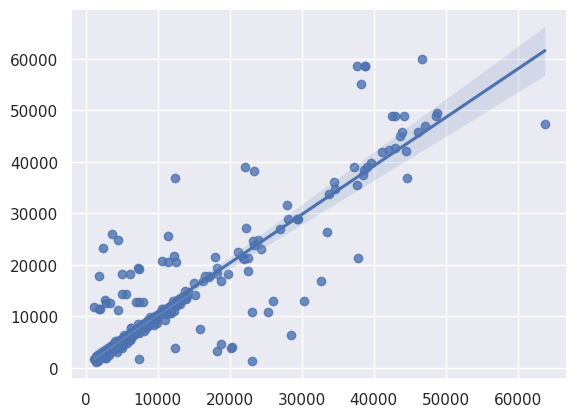

In [ ]:
sns.regplot(x = y_test, y = y_pred)